<a href="https://colab.research.google.com/github/VinniArst/Tugas-Machine-learning/blob/main/Week_7_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**XGBoost Regressor**

In [ ]:
!pip install XGBoost

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
#load data
boston = load_boston()

#split data test 15% data train 85%
from sklearn.model_selection import train_test_split
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#define parameter
xgbr = xgb.XGBRegressor(verbosity=0) 

print(xgbr)

XGBRegressor(verbosity=0)


In [ ]:
#fit model dengan data train
xgbr.fit(xtrain, ytrain)
score= xgbr.score(xtrain,ytrain)
print('Training Score:',score)

Training Score: 0.9708206289275597


In [ ]:
cv_score= cross_val_score(xgbr,xtrain,ytrain
                          ,cv=10)
print("CV mean score:",cv_score.mean())

CV mean score: 0.8523875660336208


In [ ]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)

MSE: 5.30


In [ ]:
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 2.30


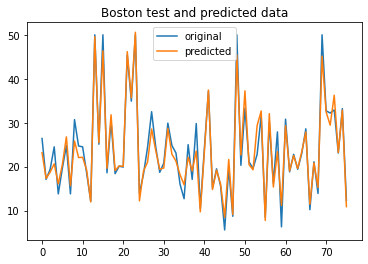

In [ ]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")

plt.title("Boston test and predicted data")

plt.legend()
plt.show()